In [49]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [50]:
# 4.1 Loading the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [51]:
print(f'Train data shape: {train_data.shape}')
print(f'Test data shape: {test_data.shape}')

Train data shape: (25000,)
Test data shape: (25000,)


In [52]:
#4.2 decoding reviews back to text
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [53]:
# 4.3 encoding the integer sequences via multi-hot encoding
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [54]:
# 4.4 model definition
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

In [55]:
# 4.5 compiling the model
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [56]:
# 4.6 setting aside a validations set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [57]:
# 4.7 training your model
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 1s 17ms/step - loss: 0.5205 - accuracy: 0.7797 - val_loss: 0.4262 - val_accuracy: 0.8289
Epoch 2/20
30/30 [==============================] - 0s 6ms/step - loss: 0.3258 - accuracy: 0.8935 - val_loss: 0.3158 - val_accuracy: 0.8821
Epoch 3/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2458 - accuracy: 0.9190 - val_loss: 0.3019 - val_accuracy: 0.8796
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1981 - accuracy: 0.9337 - val_loss: 0.2781 - val_accuracy: 0.8886
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1664 - accuracy: 0.9438 - val_loss: 0.2791 - val_accuracy: 0.8859
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1404 - accuracy: 0.9543 - val_loss: 0.2912 - val_accuracy: 0.8819
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1215 - accuracy: 0.9611 - val_loss: 0.3015 - val_accuracy: 0.8843
Epoch 8/20
30/30 [=

In [58]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

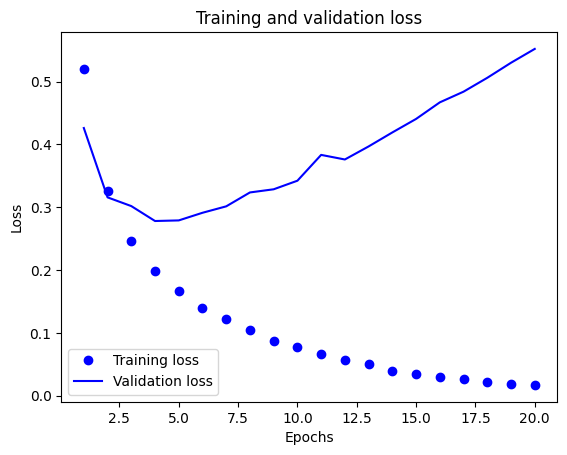

In [59]:
# 4.8 Plotting the training and validation loss
import matplotlib.pyplot as plt 
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

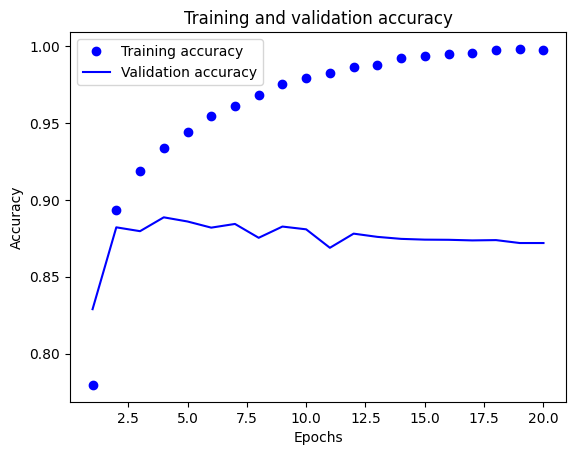

In [60]:
# Plotting the training and validation accuracy
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [61]:
# 4.10 retaining the model from scratch

model.fit(
    partial_x_train,
    partial_y_train,
    epochs=4,
    batch_size=512
)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
30/30 [==============================] - 0s 4ms/step - loss: 0.0105 - accuracy: 0.9994
Epoch 2/4
30/30 [==============================] - 0s 4ms/step - loss: 0.0147 - accuracy: 0.9965
Epoch 3/4
30/30 [==============================] - 0s 4ms/step - loss: 0.0067 - accuracy: 0.9999
Epoch 4/4
782/782 [==============================] - 0s 616us/step - loss: 0.6869 - accuracy: 0.8578


[0.6868552565574646, 0.8578400015830994]

In [62]:
model.predict(x_test)

782/782 [==============================] - 0s 565us/step


array([[1.10264169e-02],
       [9.99999523e-01],
       [5.37265480e-01],
       ...,
       [6.25552377e-04],
       [1.37064075e-02],
       [9.77191389e-01]], dtype=float32)

In [63]:
# Loading the reuters dataset
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [64]:
print(len(train_data), len(test_data))

8982 2246


In [65]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [66]:
# 4.12 Decoding newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_newswire = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [67]:
# 4.13 Ebcoding the input data
x_train = vectorize_sequences(train_data)
x__test = vectorize_sequences(test_data)

In [68]:
# 4.14 encoding the labels

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [69]:
# note that the above is already built into keras
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [70]:
# 4.15 model definition 

model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax'),
])

In [71]:
# 4.16 compiling the model
model.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [72]:
# 4.17 setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [73]:
# 4.18 Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


16/16 [==============================] - 0s 13ms/step - loss: 2.8966 - accuracy: 0.4639 - val_loss: 1.9429 - val_accuracy: 0.6060
Epoch 2/20
16/16 [==============================] - 0s 7ms/step - loss: 1.6235 - accuracy: 0.6666 - val_loss: 1.4112 - val_accuracy: 0.6890
Epoch 3/20
16/16 [==============================] - 0s 7ms/step - loss: 1.2359 - accuracy: 0.7340 - val_loss: 1.2180 - val_accuracy: 0.7250
Epoch 4/20
16/16 [==============================] - 0s 7ms/step - loss: 1.0082 - accuracy: 0.7848 - val_loss: 1.1073 - val_accuracy: 0.7520
Epoch 5/20
16/16 [==============================] - 0s 7ms/step - loss: 0.8428 - accuracy: 0.8170 - val_loss: 1.0173 - val_accuracy: 0.7810
Epoch 6/20
16/16 [==============================] - 0s 9ms/step - loss: 0.7125 - accuracy: 0.8463 - val_loss: 0.9836 - val_accuracy: 0.7810
Epoch 7/20
16/16 [==============================] - 0s 8ms/step - loss: 0.5989 - accuracy: 0.8760 - val_loss: 0.9246 - val_accuracy: 0.8100
Epoch 8/20
16/16 [============

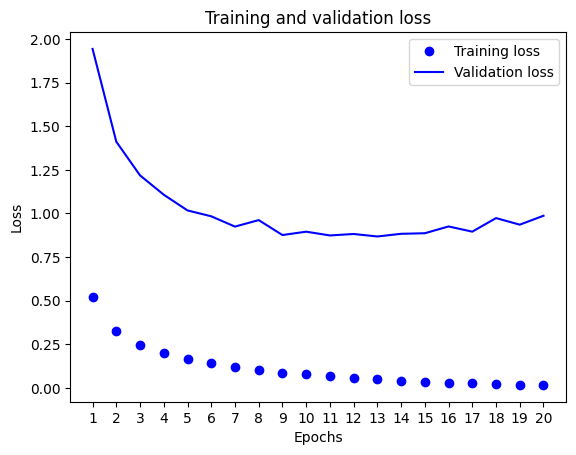

In [74]:
# 4.19 plotting the training and validation loss
loss = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()
plt.show()

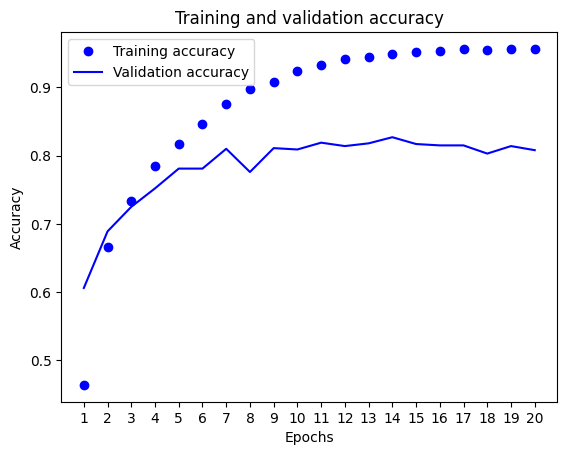

In [75]:
# 4.20 Plotting the training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()
plt.show()

In [76]:
# 4.21 retraing the model from scratch
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax'),
])
model.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
model.fit(
            x_train,
            y_train,
            epochs=9,
            batch_size=512)
results = model.evaluate(x__test, y_test)
results

Epoch 1/9
18/18 [==============================] - 0s 6ms/step - loss: 2.5606 - accuracy: 0.5209
Epoch 2/9
18/18 [==============================] - 0s 6ms/step - loss: 1.4770 - accuracy: 0.6824
Epoch 3/9
18/18 [==============================] - 0s 5ms/step - loss: 1.1390 - accuracy: 0.7553
Epoch 4/9
18/18 [==============================] - 0s 6ms/step - loss: 0.9220 - accuracy: 0.8009
Epoch 5/9
18/18 [==============================] - 0s 6ms/step - loss: 0.7630 - accuracy: 0.8343
Epoch 6/9
18/18 [==============================] - 0s 6ms/step - loss: 0.6306 - accuracy: 0.8641
Epoch 7/9
18/18 [==============================] - 0s 6ms/step - loss: 0.5305 - accuracy: 0.8888
Epoch 8/9
18/18 [==============================] - 0s 6ms/step - loss: 0.4482 - accuracy: 0.9036
Epoch 9/9
71/71 [==============================] - 0s 808us/step - loss: 0.8995 - accuracy: 0.7916


[0.8994598388671875, 0.7916295528411865]

In [77]:
# Checking what a reandom representation would be
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.188780053428317

In [78]:
# Generating predicitons on new data
predictions = model.predict(x_test)
print(predictions[0])
predictions[0].shape

782/782 [==============================] - 1s 705us/step
[0.01064301 0.09399068 0.01169842 0.10476281 0.03610263 0.00492252
 0.00270325 0.01115348 0.07642957 0.00378014 0.03256773 0.01184029
 0.01371557 0.01218117 0.02256041 0.01543346 0.0847201  0.00809571
 0.01102147 0.12911695 0.06910981 0.01206612 0.007932   0.00670838
 0.0096982  0.00302205 0.00998272 0.00948176 0.00558097 0.00770381
 0.00926942 0.01745123 0.00478699 0.0084357  0.00916637 0.00629617
 0.01727089 0.00893432 0.0036192  0.02665317 0.010453   0.00968221
 0.00925823 0.01179662 0.00100928 0.00719188]


(46,)

In [79]:
np.argmax(predictions[0])

19

In [80]:
# 4.22 A model with an information bottleneck
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(46, activation='softmax'),
])
model.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
model.fit(
            x_train,
            y_train,
            epochs=20,
            batch_size=512,
            validation_data=(x_val, y_val))
results = model.evaluate(x__test, y_test)
results

Epoch 1/20
18/18 [==============================] - 0s 12ms/step - loss: 3.4474 - accuracy: 0.1769 - val_loss: 3.0664 - val_accuracy: 0.3750
Epoch 2/20
18/18 [==============================] - 0s 7ms/step - loss: 2.8155 - accuracy: 0.3793 - val_loss: 2.4966 - val_accuracy: 0.3880
Epoch 3/20
18/18 [==============================] - 0s 7ms/step - loss: 2.3078 - accuracy: 0.4212 - val_loss: 2.0348 - val_accuracy: 0.5490
Epoch 4/20
18/18 [==============================] - 0s 7ms/step - loss: 1.9153 - accuracy: 0.5720 - val_loss: 1.7002 - val_accuracy: 0.5900
Epoch 5/20
18/18 [==============================] - 0s 7ms/step - loss: 1.6515 - accuracy: 0.5981 - val_loss: 1.4995 - val_accuracy: 0.6220
Epoch 6/20
18/18 [==============================] - 0s 7ms/step - loss: 1.4975 - accuracy: 0.6391 - val_loss: 1.3742 - val_accuracy: 0.6550
Epoch 7/20
18/18 [==============================] - 0s 7ms/step - loss: 1.3900 - accuracy: 0.6658 - val_loss: 1.2882 - val_accuracy: 0.6780
Epoch 8/20
18/18 [=

[1.3325175046920776, 0.6905609965324402]

In [81]:
# 4.23 loading the boston housing set
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [82]:
train_data.shape

(404, 13)

In [83]:
test_data.shape

(102, 13)

In [84]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [85]:
# 4.24 Normalizing the data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [86]:
# 4.25 model definition
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model
    

In [87]:
# 4.26 K-fold validation
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print(f'Processing fold #{i}')
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
         axis=0
    )
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
         axis=0
    )
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0


Processing fold #1
Processing fold #2
Processing fold #3


In [88]:
all_scores

[2.160797595977783, 2.577444553375244, 2.6910362243652344, 2.501479387283325]

In [89]:
np.mean(all_scores)

2.4826894402503967

In [90]:
 # 4.27 Saving the validation logs at each fold
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print(f'Processing fold #{i}')
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
         axis=0
    )
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
         axis=0
    )
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets),epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
    

Processing fold #0


Processing fold #1
Processing fold #2
Processing fold #3


In [91]:
# 4.28 Building the history of successive mean k-fold validation scores
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

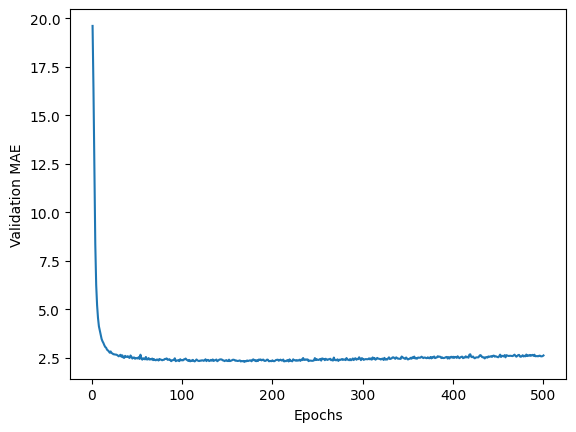

In [92]:
# 4.29 Plotting validation scores
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

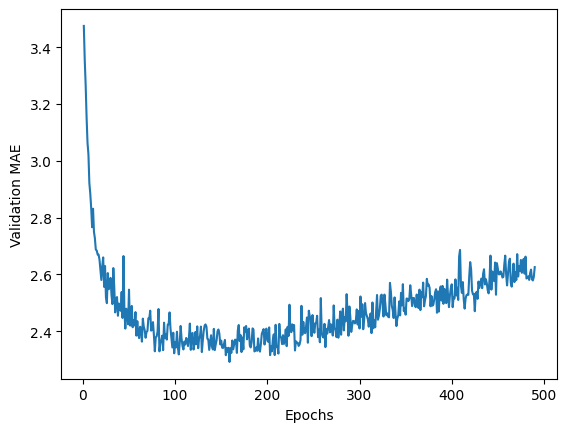

In [93]:
# 4.30 Plotting validation scores, exlusing the first 10 data points
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [94]:
# 4.31 training the final model
model = build_model()
model.fit(train_data, train_targets, epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score

4/4 [==============================] - 0s 1ms/step - loss: 18.2135 - mae: 2.8717


2.87172794342041